In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [3]:
dataset = make_blobs(n_samples=500, centers=3)

<Axes: >

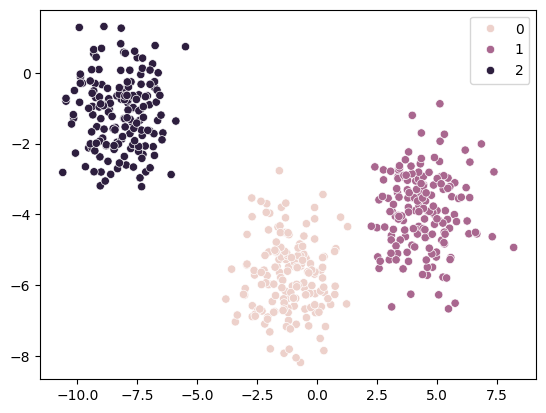

In [4]:
sns.scatterplot(x=dataset[0][:, 0], y=dataset[0][:, 1], hue=dataset[1], marker="o")

In [5]:
bandwidth = estimate_bandwidth(dataset[0], quantile=0.2, n_samples=500)
clustering = MeanShift(bandwidth=bandwidth).fit(dataset[0])

In [6]:
labels = clustering.labels_
cluster_centers = clustering.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


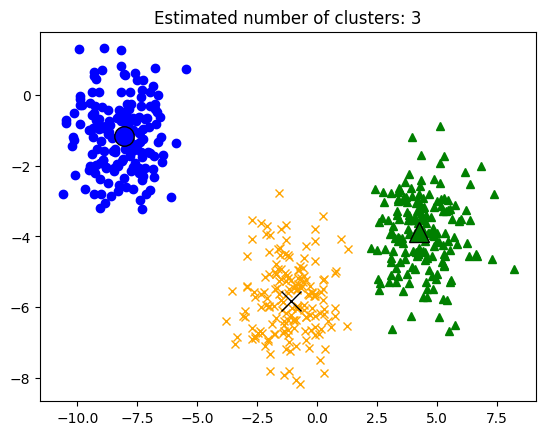

In [7]:
plt.figure(1)
plt.clf()

colors = ["orange", "blue", "green", "red"]
markers = ["x", "o", "^", "*"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(
        dataset[0][my_members, 0], dataset[0][my_members, 1], markers[k], color=col
    )
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [8]:
from pyhull.convex_hull import ConvexHull

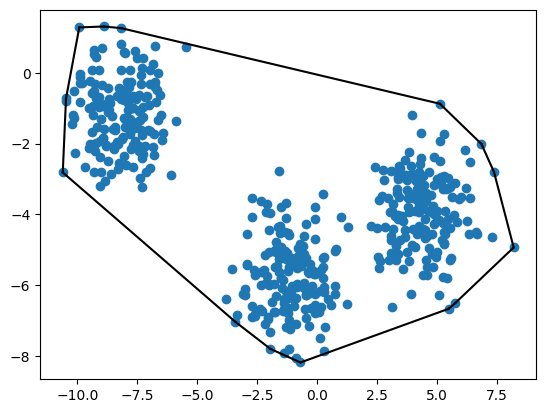

In [9]:
hull = ConvexHull(dataset[0])
plt.plot(dataset[0][:, 0], dataset[0][:, 1], "o")
for simplex in hull.simplices:
    plt.plot(simplex.coords[:, 0], simplex.coords[:, 1], "k-")

In [10]:
hulls = [ConvexHull(dataset[0][labels == i]) for i in range(n_clusters_)]

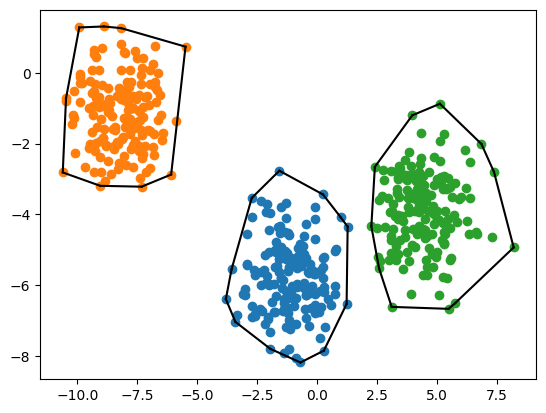

In [11]:
for i, hull in enumerate(hulls):
    subset = dataset[0][labels == i]
    plt.plot(subset[:, 0], subset[:, 1], "o")
    for simplex in hull.simplices:
        plt.plot(simplex.coords[:, 0], simplex.coords[:, 1], "k-")

In [13]:
## call the ellipse stuff
from cmaesExMultipleEllipse import *


delta = 0.05
Q_matrices, ellipse_centers = callCMAESMatrixManyEllipse(
    dataset[0], delta, n_clusters_, ellipse_centers=cluster_centers
)

Q_matrices = np.array(Q_matrices)
ellipse_centers = np.array(ellipse_centers)

D_cp = computeCPEllipseMatrixManyEllipse(dataset[0], Q_matrices, ellipse_centers, delta)
print("D_cp: " + str(D_cp))

(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=349951, Mon Nov  6 17:56:33 2023)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 2.993919699150420e+01 1.0e+00 8.93e-01  8e-01  9e-01 0:00.1
    2     22 2.435541618438472e+01 1.1e+00 8.35e-01  8e-01  9e-01 0:00.2
    3     33 2.817665965540782e+01 1.2e+00 8.78e-01  8e-01  9e-01 0:00.3
   35    385 1.900054311692541e+01 2.7e+00 6.39e-01  5e-01  7e-01 0:03.3
   78    858 1.834606612019960e+01 3.8e+00 1.61e-01  1e-01  2e-01 0:07.3
  100   1100 1.826169842632018e+01 4.8e+00 1.02e-01  7e-02  1e-01 0:09.3
  165   1815 1.800106937929369e+01 9.2e+00 7.65e-03  5e-03  8e-03 0:15.4
  200   2200 1.799436163314003e+01 1.4e+01 2.63e-03  2e-03  3e-03 0:18.7
  286   3146 1.798892011105437e+01 3.0e+01 1.46e-04  1e-04  2e-04 0:26.7
  300   3300 1.798885615658160e+01 3.0e+01 9.13e-05  6e-05  9e-05 0:28.0
  400   4400 1.798879816189349e+01 9.8e+01 2.62e-06  2e-06  4e-06 0:37.3
  500   5500 1.798879730465068e+0

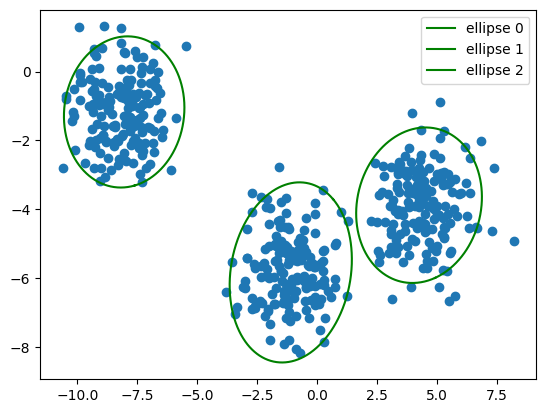

In [14]:
plt.clf()
plt.plot(dataset[0][:, 0], dataset[0][:, 1], "o")
for i in range(n_clusters_):
    plot_ellipse(ellipse_centers[i], Q_matrices[i], D_cp, "green", "ellipse " + str(i))
plt.legend()

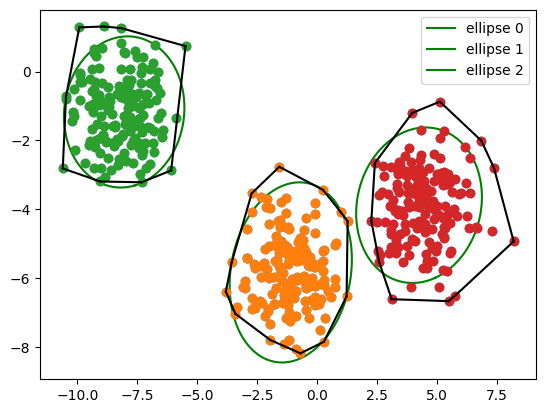

In [15]:
## generated entirely by github autopilot

plt.clf()
plt.plot(dataset[0][:, 0], dataset[0][:, 1], "o")
for i in range(n_clusters_):
    plot_ellipse(ellipse_centers[i], Q_matrices[i], D_cp, "green", "ellipse " + str(i))
    subset = dataset[0][labels == i]
    plt.plot(subset[:, 0], subset[:, 1], "o")
    for simplex in hulls[i].simplices:
        plt.plot(simplex.coords[:, 0], simplex.coords[:, 1], "k-")
plt.legend()